In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import random
from operator import add
import pandas as pd
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

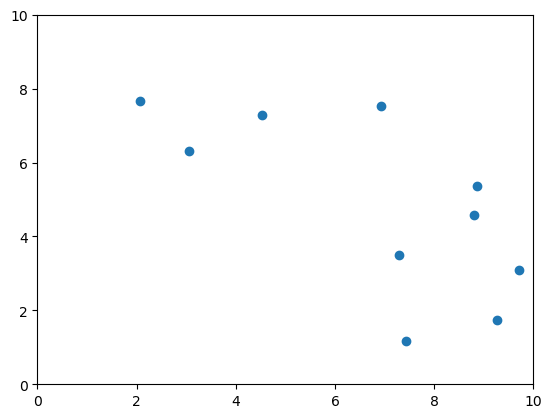

In [250]:
fig, ax = plt.subplots()
x = [random.uniform(0, 10) for _ in range(10)]
y = [random.uniform(0, 10) for _ in range(10)]
scat = ax.scatter(x, y)
plt.xlim([0, 10])
plt.ylim([0, 10])
pos = pd.DataFrame(columns=['x', 'y','xd','yd','xv','yv','xa','ya','xyd'])
k=0.1
acc=0
pos['x'] = [random.uniform(0, 10) for _ in range(10)]
pos['y'] = [random.uniform(0, 10) for _ in range(10)]
pos['xv'] = 0
pos['yv'] = 0
pos['xa'] = 0
pos['ya'] = 0
pos['xd'] = [np.zeros(10) for _ in range(10)]
pos['yd'] = [np.zeros(10) for _ in range(10)]
pos['xyd'] = [np.zeros(10) for _ in range(10)]
x0=5.0
maxd=1.5
dt=10/1000
def update(frame):
    global x,y,pos
    for i in range(len(pos)):
        pos.loc[:, 'xd'].iloc[i] = pos['x'] - pos['x'].iloc[i]
        pos.loc[:, 'yd'].iloc[i] = pos['y'] - pos['y'].iloc[i]
        pos.loc[:, 'xyd'].iloc[i] = (pos.loc[i,'xd']**2+pos.loc[i,'yd']**2)**0.5
        pos.loc[i,'xyd'][pos['xyd'][i]>x0*maxd] = np.nan
        pos.loc[i,'xyd'][pos['xyd'][i]==0.0] = np.nan
    pos['xa'] = (k*(x0-pos['xyd'])*pos['x']/pos['xyd']).apply(np.nansum)
    pos['ya'] = (k*(x0-pos['xyd'])*pos['y']/pos['xyd']).apply(np.nansum)
    pos['x'] += pos['xv']*dt + 0.5*pos['xa']*dt*dt
    pos['y'] += pos['yv']*dt + 0.5*pos['ya']*dt*dt
    pos['xv'] += pos['xa']*dt
    pos['yv'] += pos['ya']*dt
    pos[pos['x']>10]=10
    pos[pos['x']<0] = 0
    pos[pos['y']>10] = 10
    pos[pos['y']<0] = 0
    data = np.stack([pos['x'], pos['y']]).T
    scat.set_offsets(data)
    #scat = ax.scatter(x,y)
    return scat

ani = animation.FuncAnimation(fig=fig, func=update,frames=60, interval=dt*1000)
#ani.save()
plt.show()

In [2]:
pos

NameError: name 'pos' is not defined

In [262]:
k*(x0-pos['xyd'])*pos['x']/pos['xyd']

0    [nan, 0.06588313511307778, 0.5877634292332214,...
1    [0.03529360039939955, nan, -0.0230489312947573...
2    [0.44579416265958954, -0.03263329321526048, na...
3    [nan, 0.014454482636788528, -0.013590245512368...
4    [-0.020794200515830953, 0.10588206228899563, 0...
5    [0.00768565166933937, 0.45574132425771086, -0....
6    [nan, 0.0024638489601335987, nan, 0.0261652669...
7    [0.9931935660500413, 0.3569160542225746, 0.075...
8    [0.10500950169246748, 0.13314404070109073, 0.4...
9    [0.2145413489038353, -0.09298527945346266, -0....
dtype: object

In [264]:
np.nansum((k*(x0-pos['xyd'])*pos['x']/pos['xyd'])[2])

0.7421471417291123

In [255]:
k*(x0-pos['xyd'])

0    [nan, 0.03900003232255145, 0.21505609262015107...
1    [0.03900003232255145, nan, -0.0292395862125765...
2    [0.21505609262015107, -0.02923958621257654, na...
3    [nan, 0.1255412488083136, -0.23015643939048866...
4    [-0.049988581769822286, 0.1581907581155702, 0....
5    [0.005928688282451411, 0.20786749283603606, -0...
6    [nan, 0.033582408705572143, nan, 0.21665354321...
7    [0.28528378677714933, 0.16158323697257818, 0.0...
8    [0.1052729879164569, 0.12635064745228025, 0.26...
9    [0.09094692819993044, -0.05331970081464874, -0...
Name: xyd, dtype: object

In [42]:
pos = pd.DataFrame(columns=['x', 'y','xd','yd','xv','yv','xa','ya','xyd'])
pos['x'] = [random.uniform(0, 10) for _ in range(10)]
pos['y'] = [random.uniform(0, 10) for _ in range(10)]
pos['xv'] = 0
pos['yv'] = 0
pos['xa'] = 0
pos['ya'] = 0
pos['xd'] = [np.zeros(10) for _ in range(10)]
pos['yd'] = [np.zeros(10) for _ in range(10)]
pos['xyd'] = [np.zeros(10) for _ in range(10)]
x0=5.0
maxd=1.5
dt=10/1000
for i in range(len(pos)):
    pos.loc[:, 'xd'].iloc[i] = pos['x'] - pos['x'].iloc[i]
    pos.loc[:, 'yd'].iloc[i] = pos['y'] - pos['y'].iloc[i]
    pos.loc[:, 'xyd'].iloc[i] = (pos.loc[i,'xd']**2+pos.loc[i,'yd']**2)**0.5
#     pos.loc[i,'xyd'][pos['xyd'][i]>x0*maxd] = np.nan
#     pos.loc[i,'xyd'][pos['xyd'][i]==0.0] = np.nan
# pos['xa'] = (k*(x0-pos['xyd'])*pos['x']/pos['xyd']).apply(np.nansum)
# pos['ya'] = (k*(x0-pos['xyd'])*pos['y']/pos['xyd']).apply(np.nansum)
# pos['x'] += pos['xv']*dt + 0.5*pos['xa']*dt*dt
# pos['y'] += pos['yv']*dt + 0.5*pos['ya']*dt*dt
# pos['xv'] += pos['xa']*dt
# pos['yv'] += pos['ya']*dt

In [43]:
pos

,x,y,xd,yd,xv,yv,xa,ya,xyd
0,2.839802,3.636147,"[0.0, 0.691712786391284, 2.9734749958374103, 2...","[0.0, 2.8609864998811334, 0.5967008102276159, ...",0,0,0,0,"[0.0, 2.943418137363309, 3.032755415096407, 2...."
1,3.531515,6.497133,"[-0.691712786391284, 0.0, 2.2817622094461263, ...","[-2.8609864998811334, 0.0, -2.2642856896535175...",0,0,0,0,"[2.943418137363309, 0.0, 3.2145650506446706, 2..."
2,5.813277,4.232848,"[-2.9734749958374103, -2.2817622094461263, 0.0...","[-0.5967008102276159, 2.2642856896535175, 0.0,...",0,0,0,0,"[3.032755415096407, 3.2145650506446706, 0.0, 0..."
3,5.065369,4.283405,"[-2.2255668849902728, -1.5338540985989888, 0.7...","[-0.647257745978373, 2.2137287539027604, -0.05...",0,0,0,0,"[2.31777707066368, 2.6931957581365644, 0.74961..."
4,5.819518,4.815605,"[-2.979716405903128, -2.288003619511844, -0.00...","[-1.1794584526445995, 1.681528047236534, -0.58...",0,0,0,0,"[3.2046578758305926, 2.839453668673326, 0.5827..."
5,9.475824,6.945095,"[-6.6360217019436165, -5.944308915552332, -3.6...","[-3.308948334990851, -0.44796183510971765, -2....",0,0,0,0,"[7.4152493627864855, 5.961164172309785, 4.5574..."
6,1.358077,0.123979,"[1.4817252846760234, 2.1734380710673076, 4.455...","[3.5121682838735055, 6.373154783754639, 4.1088...",0,0,0,0,"[3.811933351134986, 6.733567772470953, 6.06066..."
7,6.972153,5.323351,"[-4.132350906292267, -3.440638119900983, -1.15...","[-1.687204458083305, 1.1737820417978284, -1.09...",0,0,0,0,"[4.463516875302556, 3.6353479824857, 1.5912861..."
8,1.064087,4.589433,"[1.7757151671327422, 2.467427953524026, 4.7491...","[-0.9532859534480105, 1.907700546433123, -0.35...",0,0,0,0,"[2.015420170541752, 3.11889757457551, 4.762558..."
9,1.197483,5.227476,"[1.6423183591078774, 2.3340311454991616, 4.615...","[-1.5913293488321916, 1.2696571510489418, -0.9...",0,0,0,0,"[2.2868184643992793, 2.6570153686740023, 4.721..."


In [56]:
np.where(pos['ya'] == 0, 0, pos['yv'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
pos['xyd'] = pos['xyd'].apply(lambda arr: np.where(arr == 0, np.nan, arr))

In [64]:
a=np.zeros((10,10))

In [65]:
a[2][3]

0.0

In [67]:
line=np.zeros((10,10))
for i in range(len(pos)):
    for j in range(len(pos)):
        line[i][j]=1

In [75]:
line=list(line)

In [76]:
type(line[2][3])

numpy.float64

In [101]:
pos['xyd'][0]

array([0.        , 2.94341814, 3.03275542, 2.31777707, 3.20465788,
       7.41524936, 3.81193335, 4.46351688, 2.01542017, 2.28681846])

In [95]:
pos['xyd'][0].mean()

3.1491546723119046

In [96]:
pos['xyd'].mean()

array([3.14915467, 3.37966255, 2.92734428, 2.75731225, 2.89160706,
       5.80926088, 5.64883109, 3.54854492, 3.84864446, 3.82753359])

In [119]:
pos['xyd'] = pos['xyd'].apply(lambda arr: np.where(arr > 5, np.nan, arr))

In [131]:
pos['xyd']

0    [0.0, 2.943418137363309, 3.032755415096407, 2....
1    [2.943418137363309, 0.0, 3.2145650506446706, 2...
2    [3.032755415096407, 3.2145650506446706, 0.0, 0...
3    [2.31777707066368, 2.6931957581365644, 0.74961...
4    [3.2046578758305926, 2.839453668673326, 0.5827...
5    [nan, nan, 4.557470242359649, nan, 4.231228613...
6    [3.811933351134986, nan, nan, nan, nan, nan, 0...
7    [4.463516875302556, 3.6353479824857, 1.5912861...
8    [2.015420170541752, 3.11889757457551, 4.762558...
9    [2.2868184643992793, 2.6570153686740023, 4.721...
Name: xyd, dtype: object

In [133]:
pos['xyd'].apply(lambda x: np.nanmean(x)).mean()

2.6178102530432823